SDXL_LCM to generate text to image

In [ ]:
!pip install -q diffusers rembg accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.1 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline, UNet2DConditionModel, LCMScheduler
import torch

unet = UNet2DConditionModel.from_pretrained(
    "latent-consistency/lcm-sdxl",
    torch_dtype=torch.float16,
    variant="fp16",
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", unet=unet, torch_dtype=torch.float16
).to("cuda")
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/8 [00:00<?, ?it/s]

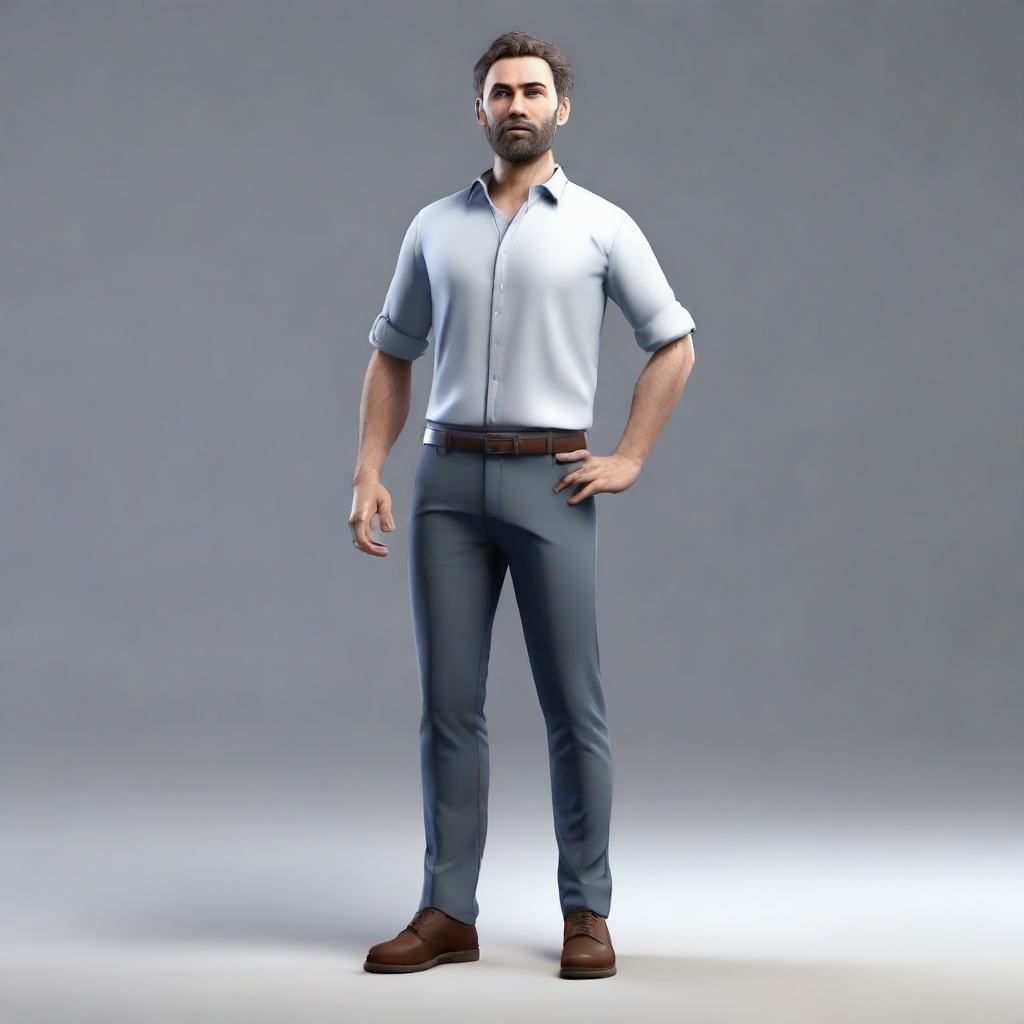

In [ ]:
your_prompt = "A man, Highly detailed Full body, standing" #@param {type: 'string'}
prompt = "3D render, " + your_prompt +",high detailed, 8k uhd, dslr, soft lighting, high quality, perfect structure"

image = pipe(
    prompt=prompt, num_inference_steps=8, guidance_scale=8
).images[0]

gen_image_pth = "output_image.png"

image.save(gen_image_pth)
image

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 124GB/s]


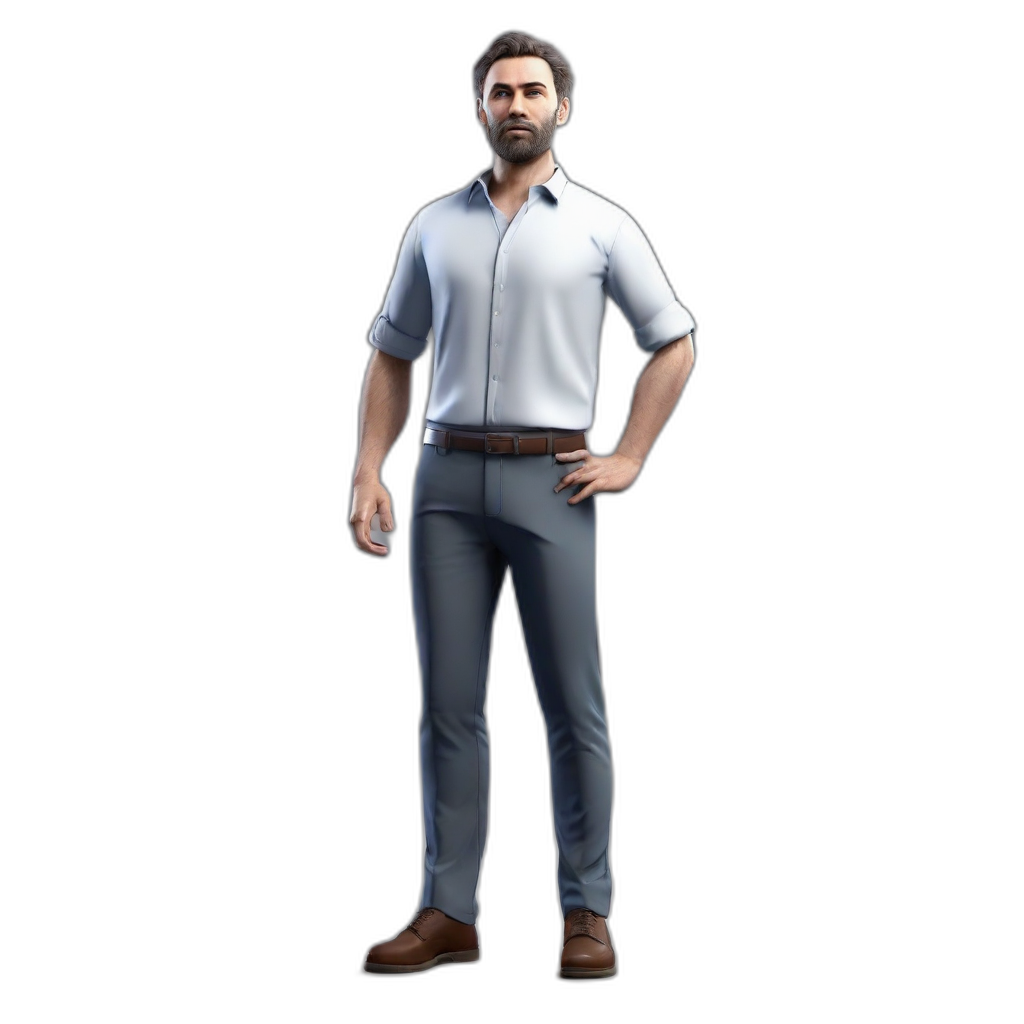

In [ ]:
from rembg import remove
from PIL import Image

input_path = gen_image_pth
output_path = 'output_image.png'

input = Image.open(input_path)
output = remove(input)
output.save(output_path)
output

SDXL_LCM uses 12/16 GB gpu so belo code will reset gpu to zero for magic123 to work (not applicable if using A100)

In [ ]:
!pip install numba
from numba import cuda
device = cuda.get_current_device()
device.reset()

##Clone threestudio repo

In [ ]:
!git clone https://github.com/threestudio-project/threestudio.git
!pip install git+https://github.com/NVlabs/tiny-cuda-nn/#subdirectory=bindings/torch

fatal: destination path 'threestudio' already exists and is not an empty directory.
  Cloning https://github.com/NVlabs/tiny-cuda-nn/ to /tmp/pip-req-build-na48sc2_
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/tiny-cuda-nn/ /tmp/pip-req-build-na48sc2_
  Resolved https://github.com/NVlabs/tiny-cuda-nn/ to commit 212104156403bd87616c1a4f73a1c5f2c2e172a9
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for tinycudann: filename=tinycudann-1.7-cp310-cp310-linux_x86_64.whl size=30508141 sha256=662bc60fdb02606fabb2975a3164582f11854fe688a5582f73822fb6ea8d1e2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-txeoeltp/wheels/32/d8/5e/dc94eca0794af9e09a6d97f19cf15dfe9bbbc4d56ae4db4aa2
Successfully built tinycudann


In [ ]:
%cd /content/threestudio/

/content/threestudio


Install dependencies

In [ ]:
!pip install -q ninja
!pip install -q lightning==2.0.0 omegaconf==2.3.0 jaxtyping typeguard diffusers transformers accelerate opencv-python tensorboard matplotlib imageio imageio[ffmpeg] trimesh bitsandbytes sentencepiece safetensors huggingface_hub libigl xatlas networkx pysdf PyMCubes wandb torchmetrics controlnet_aux
!pip install -q einops kornia taming-transformers-rom1504 git+https://github.com/openai/CLIP.git # zero123
!pip install -q open3d plotly # mesh visualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.5/688.5 kB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 65.4 MB

And build some dependencies manually. This may take a while.

In [ ]:
!pip install -q git+https://github.com/ashawkey/envlight.git
!pip install -q git+https://github.com/KAIR-BAIR/nerfacc.git@v0.5.2
!pip install -q git+https://github.com/NVlabs/nvdiffrast.git

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q diffusers==0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.1 MB/s eta 0:00:00


Login to HuggingFace

In [ ]:
from huggingface_hub import interpreter_login

interpreter_login("")


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: ··········
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Now create your own 3D model from text prompts

Here we use the DreamFusion model with DeepFloyd-IF guidance. You may try other models by using different running commands given [here](https://github.com/threestudio-project/threestudio#supported-models).

In [ ]:
prompt = "A man"

In [ ]:

# !python launch.py --config configs/dreamfusion-if.yaml --train --gpu 0 system.prompt_processor.prompt="$prompt" trainer.max_steps=10000 system.prompt_processor.spawn=false
# Zero123 + Stable Diffusion, ~12GB VRAM
# data.image_path must point to a 4-channel RGBA image
# system.prompt_proessor.prompt must be specified
!python launch.py --config configs/magic123-coarse-sd.yaml --train --gpu 0 data.image_path=/content/output_image.png system.prompt_processor.prompt="A woman"

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

In [ ]:
from IPython.display import HTML
from base64 import b64encode
def display_video(video_path):
  mp4 = open(video_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=1000 controls>
    <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

In [ ]:
# you will see the path to the saving directory at the end of the training logs
# replace save_dir below with that path
save_dir = 'outputs/magic123-coarse-sd/output_image.png-A_woman@20231209-143027/save'
import os
import glob
video_path = glob.glob(os.path.join(save_dir, "*-test.mp4"))[0]
display_video(video_path)

IndexError: ignored

In [ ]:
# %cd /content/threestudio/outputs/
# %rm -rf magic123-refine-sd
# %cd /content/threestudio/

In [ ]:
# Zero123 + Stable Diffusion, ~10GB VRAM
# data.image_path must point to a 4-channel RGBA image
# system.prompt_proessor.prompt must be specified
!python launch.py --config configs/magic123-refine-sd.yaml --train --gpu 0 data.image_path=/content/output_image.png system.prompt_processor.prompt="A woman" system.geometry_convert_from=/content/threestudio/outputs/magic123-coarse-sd/output_image.png-A_woman@20231209-143027/ckpts/last.ckpt system.renderer.context_type=cuda
# if you're unsatisfied with the surface extracted using the default threshold (25)
# you can specify a threshold value using `system.geometry_convert_override`
# decrease the value if the extracted surface is incomplete, increase if it is extruded
# python launch.py --config configs/magic123-refine-sd.yaml --train --gpu 0 data.image_path=load/images/hamburger_rgba.png system.prompt_processor.prompt="a delicious hamburger" system.geometry_convert_from=/content/threestudio/outputs/magic123-coarse-sd/output_image.png-minecraft_person@20231206-101050/ckpts/last.ckpt system.geometry_convert_override.isosurface_threshold=10.

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

Display the rendered video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
def display_video(video_path):
  mp4 = open(video_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=1000 controls>
    <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

In [ ]:
# you will see the path to the saving directory at the end of the training logs
# replace save_dir below with that path
save_dir = 'outputs/magic123-refine-sd/output_image.png-A_woman@20231209-151944/save'

import os
import glob
video_path = glob.glob(os.path.join(save_dir, "*-test.mp4"))[0]
display_video(video_path)

IndexError: ignored

Extract the object mesh.

Here we use an empirical threshold value. You can also first try `system.geometry.isosurface_threshold=auto` and visualize it. Then you can manually adjust the threshold according to the automatically determined value shown in the logs. Increase it if there are too many floaters and decrease it if the geometry is incomplete.


The extraction process takes around 2 mins on T4.

In [ ]:
!python launch.py --config $save_dir/../configs/parsed.yaml --export --gpu 0 resume=$save_dir/../ckpts/last.ckpt system.exporter_type=mesh-exporter system.exporter.context_type=cuda

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

Visualize the mesh. Or you can directly download the export assets and use them locally.

In [ ]:
import numpy as np
import open3d as o3d
import plotly.graph_objects as go
import glob

mesh_path = glob.glob(os.path.join(save_dir, "*-export/model.obj"))[0]
mesh = o3d.io.read_triangle_mesh(mesh_path)
if not mesh.has_vertex_normals():
  mesh.compute_vertex_normals()
if not mesh.has_triangle_normals():
  mesh.compute_triangle_normals()

triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
  colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
  colors = tuple(map(tuple, colors))
else:
  colors = (1.0, 0.0, 0.0)
fig = go.Figure(
  data=[
    go.Mesh3d(
      x=vertices[:,0],
      y=vertices[:,1],
      z=vertices[:,2],
      i=triangles[:,0],
      j=triangles[:,1],
      k=triangles[:,2],
      facecolor=colors,
      opacity=0.50)
  ],
  layout=dict(
    scene=dict(
      xaxis=dict(visible=False),
      yaxis=dict(visible=False),
      zaxis=dict(visible=False)
    )
  )
)
fig.show()
